# Imports

In this section, we will import that packages needed to run the projects

In [1]:
import pandas as pd
import time
from datetime import datetime, timedelta
import json
import requests
import re
import matplotlib as plt
from bs4 import BeautifulSoup
from datetime import date
from functools import reduce
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Data Acquisition & Treating

In This section we will crawl to get the data from the internet to out data frame.
The data comes from seperate websites so we will have to crawl few times and treat the data few times.
For each seperate website we will perform the needed adjustions to fit the final data frame, for example:
changing the column name from "Country, Region" To Country

### Data Acquisition - Covid

In [2]:
def crawl_covid_data():
    # Get html page
    html = requests.get("https://www.worldometers.info/coronavirus/#countries").text
    # Fix crawling problem
    html = re.sub(r'<.*?>', lambda g: g.group(0).upper(), html)
    # Get table
    tables = pd.read_html(html)
    df = pd.DataFrame()
    # Convert to datagrame
    df = pd.concat([df, tables[0]], ignore_index=True)
    return(df)


crawl_covid_data()
    
    
    

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/ 1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,NaN,North America,40515370,"+11,270",916506.0,+288,33952589.0,"+7,995",5646275.0,10996.0,...,NaN,NaN,NaN,North America,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Asia,55412202,"+129,721",784930.0,"+2,307",52799410.0,"+134,229",1827862.0,26431.0,...,NaN,NaN,NaN,Asia,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,South America,32504148,"+6,114",993065.0,+190,29389111.0,"+7,284",2121972.0,30941.0,...,NaN,NaN,NaN,South America,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Europe,47791923,"+42,264",1099410.0,+709,45274417.0,"+27,292",1418096.0,7410.0,...,NaN,NaN,NaN,Europe,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Africa,5459104,"+25,382",141453.0,+389,4772673.0,"+14,558",544978.0,4742.0,...,NaN,NaN,NaN,Africa,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,NaN,Total:,47791923,"+42,264",1099410.0,+709,45274417.0,"+27,292",1418096.0,7410.0,...,NaN,NaN,NaN,Europe,NaN,NaN,NaN,NaN,NaN,NaN
234,NaN,Total:,5459104,"+25,382",141453.0,+389,4772673.0,"+14,558",544978.0,4742.0,...,NaN,NaN,NaN,Africa,NaN,NaN,NaN,NaN,NaN,NaN
235,NaN,Total:,73513,+301,1274.0,NaN,68615.0,NaN,3624.0,10.0,...,NaN,NaN,NaN,Australia/Oceania,NaN,NaN,NaN,NaN,NaN,NaN
236,NaN,Total:,721,NaN,15.0,NaN,706.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Treating - Covid

In [3]:
def get_covid_dataframe():
    df = crawl_covid_data()
    # Keeping only the needed columns
    df = df[["Country,Other", "TotalCases", "TotalTests", "Population"]]
    # Rename coulmns
    df.rename(columns={'Country,Other': 'Country',
                   'TotalCases': 'Total Cases', 'TotalTests': 'Total Tests'}, inplace=True)
    df['Country'] = df['Country'].str.replace('USA', 'United States')
    df['Country'] = df['Country'].str.replace('UK', 'United Kingdom')
    df['Country'] = df['Country'].str.replace('UAE', 'United Arab Emirates')
    # Clean data
    df.dropna(how='any', inplace=True)
    return(df)

get_covid_dataframe()

,Country,Total Cases,Total Tests,Population
8,United States,34490884,503583536.0,3.329132e+08
9,India,30278912,404265101.0,1.393346e+09
10,Brazil,18386894,53196856.0,2.140462e+08
11,France,5770021,92527219.0,6.541580e+07
12,Russia,5451291,147900000.0,1.459961e+08
...,...,...,...,...
219,Saint Pierre Miquelon,26,6128.0,5.766000e+03
220,Montserrat,20,1408.0,4.995000e+03
221,Solomon Islands,20,4500.0,7.033800e+05
224,Vanuatu,4,23000.0,3.141760e+05


### Data Acquisition - Area

In [4]:
def crawl_area_data():
    # Get html page
    html = requests.get("https://www.worldometers.info/geography/largest-countries-in-the-world").text
    # Get table
    tables = pd.read_html(html)
    df = pd.DataFrame()
    # Convert to datagrame
    df = pd.concat([df, tables[0]], ignore_index=True)
    return(df)
crawl_area_data()


,#,Country,Tot. Area (Km²),Tot. Area (mi²),Land Area (Km²),Land Area (mi²),% of world landmass
0,1,Russia,17098242,6601665,16376870,6323142,11.0 %
1,2,Canada,9984670,3855101,9093510,3511022,6.1 %
2,3,China,9706961,3747877,9388211,3624807,6.3 %
3,4,United States,9372610,3618783,9147420,3531837,6.1 %
4,5,Brazil,8515767,3287955,8358140,3227095,5.6 %
...,...,...,...,...,...,...,...
230,230,Tokelau,12,5,10,4,0.0 %
231,231,Gibraltar,6,2,10,4,0.0 %
232,232,Monaco,2,1,1,1,0.0 %
233,233,Holy See,0,0,0,0,0.0 %


### Data Treating - Area

In [5]:
def get_area_dataframe():
    df = crawl_area_data()
    # Keeping only the needed columns
    df = df[["Country", "Land Area (Km²)", "% of world landmass"]]
    # Clean data
    df.dropna(how='any', inplace=True)
    return(df)
get_area_dataframe()
    

,Country,Land Area (Km²),% of world landmass
0,Russia,16376870,11.0 %
1,Canada,9093510,6.1 %
2,China,9388211,6.3 %
3,United States,9147420,6.1 %
4,Brazil,8358140,5.6 %
...,...,...,...
230,Tokelau,10,0.0 %
231,Gibraltar,10,0.0 %
232,Monaco,1,0.0 %
233,Holy See,0,0.0 %


### Data Acquisition - GDP

In [6]:
def crawl_GDP_data():
    # Get html page
    html = requests.get("https://www.imf.org/en/Publications/WEO/weo-database/2021/April/weo-report?c=512,914,612,614,311,213,911,314,193,122,912,313,419,513,316,913,124,339,638,514,218,963,616,223,516,918,748,618,624,522,622,156,626,628,228,924,233,632,636,634,238,662,960,423,935,128,611,321,243,248,469,253,642,643,939,734,644,819,172,132,646,648,915,134,652,174,328,258,656,654,336,263,268,532,944,176,534,536,429,433,178,436,136,343,158,439,916,664,826,542,967,443,917,544,941,446,666,668,672,946,137,546,674,676,548,556,678,181,867,682,684,273,868,921,948,943,686,688,518,728,836,558,138,196,278,692,694,962,142,449,564,565,283,853,288,293,566,964,182,359,453,968,922,714,862,135,716,456,722,942,718,724,576,936,961,813,726,199,733,184,524,361,362,364,732,366,144,146,463,528,923,738,578,537,742,866,369,744,186,925,869,746,926,466,112,111,298,927,846,299,582,487,474,754,698,&s=NGDPD,&sy=2019&ey=2026&ssm=0&scsm=1&scc=0&ssd=1&ssc=0&sic=0&sort=country&ds=.&br=1").text
    # Get table
    tables = pd.read_html(html)
    df = pd.DataFrame()
    # Convert to datagrame
    df = pd.concat([df, tables[0]], ignore_index=True)
    return(df)
crawl_GDP_data()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2019,2020,2021,2022,2023,2024,2025,2026
0,Afghanistan,"Gross domestic product, current prices",U.S. dollars,Billions,NaN,18.876,19.132,19.938,21.201,22.010,22.754,23.896,24.553
1,Albania,"Gross domestic product, current prices",U.S. dollars,Billions,NaN,15.276,15.147,17.138,18.320,19.662,21.009,22.422,23.903
2,Algeria,"Gross domestic product, current prices",U.S. dollars,Billions,NaN,171.070,144.294,151.459,150.135,150.035,150.530,151.906,153.802
3,Angola,"Gross domestic product, current prices",U.S. dollars,Billions,NaN,89.603,62.440,66.493,68.532,72.894,78.231,84.371,89.816
4,Antigua and Barbuda,"Gross domestic product, current prices",U.S. dollars,Billions,NaN,1.662,1.390,1.376,1.570,1.702,1.838,1.947,2.046
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Vietnam,"Gross domestic product, current prices",U.S. dollars,Billions,NaN,329.537,340.821,354.868,389.746,428.124,471.420,517.265,567.262
191,West Bank and Gaza,"Gross domestic product, current prices",U.S. dollars,Billions,NaN,17.134,15.519,16.481,17.886,18.831,19.559,20.245,20.955
192,Yemen,"Gross domestic product, current prices",U.S. dollars,Billions,NaN,22.568,20.140,25.095,25.826,29.102,30.772,32.669,34.334
193,Zambia,"Gross domestic product, current prices",U.S. dollars,Billions,NaN,23.309,18.529,18.955,19.083,19.587,20.294,21.032,21.813


### Data Treating - GDP

In [7]:
def get_GDP_dataframe():
    df = crawl_GDP_data()
    # Keeping only the needed columns
    df = df[["Country", "2019"]]
    df.rename(columns={'2019': 'GDP Current Price ($)'}, inplace=True)
    return(df)
get_GDP_dataframe()
    

,Country,GDP Current Price ($)
0,Afghanistan,18.876
1,Albania,15.276
2,Algeria,171.070
3,Angola,89.603
4,Antigua and Barbuda,1.662
...,...,...
190,Vietnam,329.537
191,West Bank and Gaza,17.134
192,Yemen,22.568
193,Zambia,23.309


### Data Acquisition - Unemployment Rate

In [8]:
def crawl_unemployment_data():
    # Get html page
    html = requests.get("https://www.imf.org/en/Publications/WEO/weo-database/2021/April/weo-report?c=512,914,612,614,311,213,911,314,193,122,912,313,419,513,316,913,124,339,638,514,218,963,616,223,516,918,748,618,624,522,622,156,626,628,228,924,233,632,636,634,238,662,960,423,935,128,611,321,243,248,469,253,642,643,939,734,644,819,172,132,646,648,915,134,652,174,328,258,656,654,336,263,268,532,944,176,534,536,429,433,178,436,136,343,158,439,916,664,826,542,967,443,917,544,941,446,666,668,672,946,137,546,674,676,548,556,678,181,867,682,684,273,868,921,948,943,686,688,518,728,836,558,138,196,278,692,694,962,142,449,564,565,283,853,288,293,566,964,182,359,453,968,922,714,862,135,716,456,722,942,718,724,576,936,961,813,726,199,733,184,524,361,362,364,732,366,144,146,463,528,923,738,578,537,742,866,369,744,186,925,869,746,926,466,112,111,298,927,846,299,582,487,474,754,698,&s=LUR,&sy=2019&ey=2026&ssm=0&scsm=1&scc=0&ssd=1&ssc=0&sic=0&sort=country&ds=.&br=1").text
    # Get table
    tables = pd.read_html(html)
    df = pd.DataFrame()
    # Convert to datagrame
    df = pd.concat([df, tables[0]], ignore_index=True)
    return(df)
crawl_unemployment_data()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2019,2020,2021,2022,2023,2024,2025,2026
0,Afghanistan,Unemployment rate,Percent of total labor force,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,Unemployment rate,Percent of total labor force,NaN,NaN,11.500,12.500,14.000,13.000,12.500,12.000,11.000,10.000
2,Algeria,Unemployment rate,Percent of total labor force,NaN,NaN,11.383,14.242,14.541,14.863,15.933,17.077,18.245,19.406
3,Angola,Unemployment rate,Percent of total labor force,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Antigua and Barbuda,Unemployment rate,Percent of total labor force,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Vietnam,Unemployment rate,Percent of total labor force,NaN,NaN,2.170,3.300,2.700,2.400,2.300,2.300,2.300,2.300
191,West Bank and Gaza,Unemployment rate,Percent of total labor force,NaN,NaN,25.350,25.925,25.124,25.324,25.724,26.024,26.224,26.274
192,Yemen,Unemployment rate,Percent of total labor force,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,Zambia,Unemployment rate,Percent of total labor force,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Treating - Unemployment Rate

In [9]:
def get_unemployment_dataframe():
    df = crawl_unemployment_data()
    # Keeping only the needed columns
    df = df[["Country", "2019"]]
    df.rename(columns={'2019': 'Unemployment Rate'}, inplace=True)
    return(df)
get_unemployment_dataframe()
    

,Country,Unemployment Rate
0,Afghanistan,NaN
1,Albania,11.500
2,Algeria,11.383
3,Angola,NaN
4,Antigua and Barbuda,NaN
...,...,...
190,Vietnam,2.170
191,West Bank and Gaza,25.350
192,Yemen,NaN
193,Zambia,NaN


### Data Acquisition - Country Age

In [10]:
def crawl_country_age_data():
    # Get html page
    html = requests.get("https://www.tutorialspoint.com/general_knowledge/general_knowledge_countries_its_independence_date.htm").text
    # Get table
    tables = pd.read_html(html)
    df = pd.DataFrame()
    # Convert to datagrame
    df = pd.concat([df, tables[0]], ignore_index=True)
    return(df)
crawl_country_age_data()

,Country,Date
0,Hungary,"August 20, 1000"
1,Switzerland,"August 1, 1291"
2,Sweden,"June 6, 1523"
3,Portugal,"December 1, 1640"
4,United States,"July 4, 1776"
...,...,...
170,Eritrea,"May 24, 1993"
171,East Timor,"May 20, 2002"
172,Montenegro,"May 21, 2006"
173,Kosovo,"February 17, 2008"


### Data Treating - Country Age

In [11]:
def get_country_age_dataframe():
    df = crawl_country_age_data()
    # Keeping only the needed columns
    df = df[["Country", "Date"]]
    df.dropna(how='any', inplace=True)
    todays_date = date.today()
    df["Date"] = df["Date"].apply(lambda x: int(todays_date.year - int(re.search(r"[0-9]{4}", x).group())))
    df.rename(columns={'Date': 'Country Age'}, inplace=True)
    pd.set_option('display.max_rows', df.shape[0]+1)
    df.drop_duplicates(subset='Country', inplace=True)
    return(df)
get_country_age_dataframe()

,Country,Country Age
0,Hungary,1021
1,Switzerland,730
2,Sweden,498
3,Portugal,381
4,United States,245
5,Haiti,217
6,Serbia,217
7,Ecuador,212
8,Chile,211
9,Colombia,211


### Data Acquisition - Median Age

In [12]:
def crawl_median_age_data():
    # Get html page
    html = requests.get("https://en.wikipedia.org/wiki/List_of_countries_by_median_age").text
    # Get table
    tables = pd.read_html(html, header=1)
    df = pd.DataFrame()
    # Convert to datagrame
    df = pd.concat([df, tables[0]], ignore_index=True)
    df = df[1:]
    return(df)
crawl_median_age_data()

,Country/Territory,Rank,2018 median,2020 medians,2020 medians.1,2020 medians.2
1,Afghanistan,204,18.9,19.5,19.4,19.5
2,Albania,92,32.9,34.3,32.9,35.7
3,Algeria,141,28.1,28.9,28.6,29.3
4,American Samoa,151,25.5,27.2,26.7,27.7
5,Andorra,6,44.3,46.2,46.3,46.1
...,...,...,...,...,...,...
226,Western Sahara (2018 & 2019 estimates),186,21.1,21.5,21.0,21.9
227,World,120,30.6,31.0,30.3,31.8
228,Yemen (2016 & 2018 estimates),201,19.5,19.8,19.6,19.9
229,Zambia,223,16.8,16.9,16.7,17.0


### Data Treating - Median Age

In [13]:
def get_median_age_dataframe():
    df = crawl_median_age_data()
    # Keeping only the needed columns
    df = df[["Country/Territory", "2018 median", "2020 medians"]]
    df.rename(columns={'Country/Territory': 'Country', '2018 median':'2018 Median Age',  '2020 medians':'2020 Median Age'}, inplace=True)
    return(df)
get_median_age_dataframe()

,Country,2018 Median Age,2020 Median Age
1,Afghanistan,18.9,19.5
2,Albania,32.9,34.3
3,Algeria,28.1,28.9
4,American Samoa,25.5,27.2
5,Andorra,44.3,46.2
...,...,...,...
226,Western Sahara (2018 & 2019 estimates),21.1,21.5
227,World,30.6,31.0
228,Yemen (2016 & 2018 estimates),19.5,19.8
229,Zambia,16.8,16.9


## Merging the tables
In this section we will merge all the different dataframes we got after crawling the data and treating it,
to one big final dataframe with all the data after light adjustments.


In [14]:
def get_merged_dataframe():
    # Getting all the dataframes
    df1 = get_covid_dataframe()
    df2 = get_area_dataframe()
    df3 = get_GDP_dataframe()
    df4 = get_unemployment_dataframe()
    df5 = get_country_age_dataframe()
    df6 = get_median_age_dataframe()  
    data_frames = [df1, df2, df3, df4, df5, df6]
    # Merging
    df_merged = reduce(lambda  left,right: pd.merge(left,right, on=['Country'],
                                            how='outer'), data_frames).drop_duplicates()
    # Drop any rows with less than 8 not NaN values
    df_merged.dropna(thresh=8, inplace = True)
    return df_merged.reset_index()


get_merged_dataframe().dropna()


,index,Country,Total Cases,Total Tests,Population,Land Area (Km²),% of world landmass,GDP Current Price ($),Unemployment Rate,Country Age,2018 Median Age,2020 Median Age
0,0,United States,34490884.0,503583536.0,332913170.0,9147420.0,6.1 %,21433.225,3.683,245.0,38.1,38.5
2,2,Brazil,18386894.0,53196856.0,214046220.0,8358140.0,5.6 %,1877.114,11.925,199.0,34.3,33.2
5,5,Turkey,5409027.0,60105441.0,85231269.0,769630.0,0.5 %,760.940,13.709,98.0,30.9,32.2
7,7,Argentina,4393142.0,16367985.0,45603661.0,2736690.0,1.8 %,444.458,9.825,205.0,31.7,32.4
9,9,Colombia,4126340.0,19519944.0,51416087.0,1109500.0,0.7 %,323.375,10.500,211.0,30.0,31.2
13,13,Poland,2879638.0,17249401.0,37805748.0,306230.0,0.2 %,595.772,3.279,103.0,40.7,41.9
14,14,Mexico,2503408.0,7446966.0,130264582.0,1943950.0,1.3 %,1268.868,3.497,211.0,28.3,29.3
15,15,Ukraine,2233996.0,10794794.0,43474491.0,579320.0,0.4 %,153.895,8.500,102.0,40.6,41.2
17,17,Peru,2046057.0,14042806.0,33423020.0,1280000.0,0.9 %,230.746,6.600,200.0,28.0,29.1
18,18,South Africa,1928897.0,12968748.0,60043472.0,1213090.0,0.8 %,351.354,28.700,90.0,27.1,28.0


 # Final Data Treating
 In this section we will finalize the dataframe after all the data is in it.
 We create a column the combines two columns - for better relation.
 And we create df2 that containts only numeric data(Without country name and index) and make sure
 all the data is not strings but floats or integers
 Also, we will scale the data.

In [15]:
df = get_merged_dataframe()

In [16]:
# Create 2 new columns 
df['Population Density'] = df['Population'] / (df['Land Area (Km²)'])
df['Positive Tests'] = df['Total Cases'] / df['Total Tests']

# Convert '% of world landmass' column to numbers to make them actual float values
df2 = df.dropna(subset={'% of world landmass'})
df2["% of world landmass"] = df2["% of world landmass"].apply(lambda x: x[:len(x) - 2])
# Removing the information columns for proper data analysis
df2 = df2.drop(['index', 'Country'], axis=1)
# Convert all the dataframe to actual float values
df2 = df2.astype('float')

<ipython-input-16-852815c88831>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["% of world landmass"] = df2["% of world landmass"].apply(lambda x: x[:len(x) - 2])


## SCALING
In this section we will scale the data that needs to be scaled.
This is needed because sometimes - as can be seen in "Population Denisty" column,
the are few values that are much much higher the others, which makes the plot unreadable.
So we will scale the values and fix it.

### Visualizing the scale
Plot example for why scale is needed

<AxesSubplot:xlabel='Population Density'>

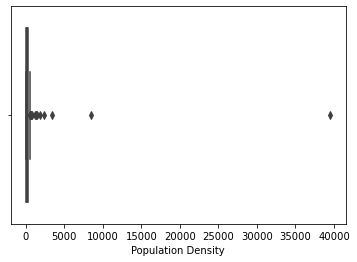

In [17]:
sns.boxplot(x=df2["Population Density"])

In [18]:
df2["Population Density"].describe()

count      180.000000
mean       467.156244
std       3015.069406
min          0.138548
25%         32.104411
50%         95.324318
75%        221.538612
max      39516.000000
Name: Population Density, dtype: float64

### Scaling the data

In [19]:
mycols = ["% of world landmass", "GDP Current Price ($)" ,"Country Age", "Population Density", "Positive Tests"]
for col in mycols:
        print(col + ":")
        # Calculating first quarter
        Q1 = np.nanpercentile(df2[col], 25)
        # Calculating third quarter
        Q3 = np.nanpercentile(df2[col], 75)
        # IQR and IQR range
        IQR = Q3 - Q1
        IQR_range = 1.5 * IQR
        # How many outliers values are there
        print(len(df2[(df2[col] < Q1 - IQR_range) | (df2[col] > Q3 + IQR_range )].index))
        # Removing them
        df2[(df2[col] < Q1 - IQR_range) | (df2[col] > Q3 + IQR_range )] = np.nan

% of world landmass:
16
GDP Current Price ($):
13
Country Age:
20
Population Density:
17
Positive Tests:
3


# EDA & Visualization
In this section we will use EDA and Visualization to understand the data we have,
because out minds understand plots much better then hundreds of lines of data.

### The relation between the country attributes to the positive tests rate

Relations


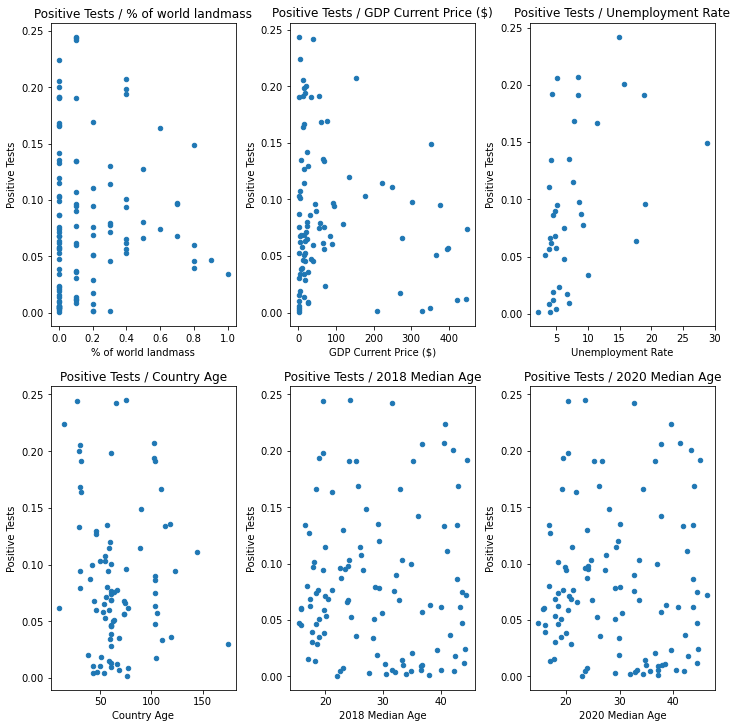

In [20]:
start_index = 4
end_index = 2
# Create the plots grid
fig, ax = plt.subplots(2, int((df2.shape[1] - start_index - end_index) /2), constrained_layout=True, figsize=(10,10))
# Fix subplots multiple lines problem
ax = ax.ravel()
print("Relations")
# Iterate over the wanted columns
for index in range(start_index, df2.shape[1] - end_index):
    col = df2.columns[index]
    # Setting the titles
    ax[index - start_index].title.set_text('Positive Tests / ' + col)
    # Clearing Nans
    df3 = df2.dropna(subset = {"Positive Tests", col}).sort_values(col)
    # Plot
    df3.plot(x=col, y= 'Positive Tests', kind='scatter', ax=ax[index - start_index])



### Multiple plots to understand the relation between Population Density and Positive Tests rate

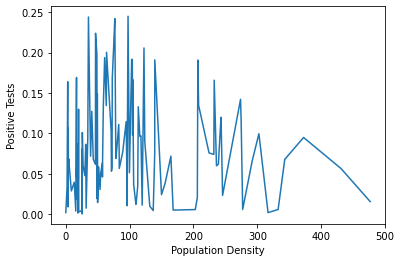

In [21]:
g = sns.lineplot(x = df2['Population Density'], y = df2['Positive Tests'])

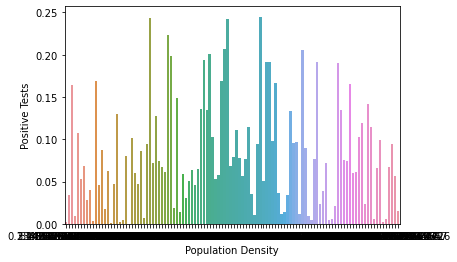

In [22]:
g = sns.barplot(x = df2['Population Density'], y = df2['Positive Tests'])

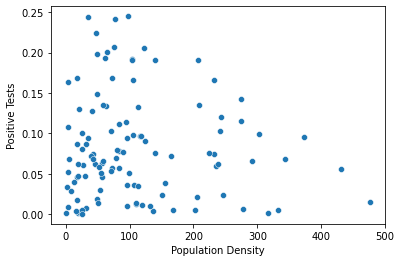

In [23]:
g = sns.scatterplot(x = df2['Population Density'], y = df2['Positive Tests'])

## 3 dimensions plots

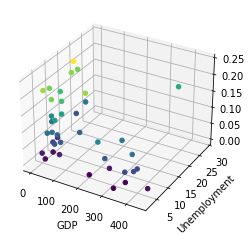

In [24]:
ax = plt.axes(projection='3d')
# X 
xdata= df2["GDP Current Price ($)"]
# Y
ydata= df2["Unemployment Rate"]
# Z
zdata= df2["Positive Tests"]
plt.xlabel('GDP')
plt.ylabel('Unemployment')
ax.scatter3D(xdata, ydata, zdata, c=zdata, depthshade = False)

### Pairplot between all the attributes of the country - just for extra knowledge

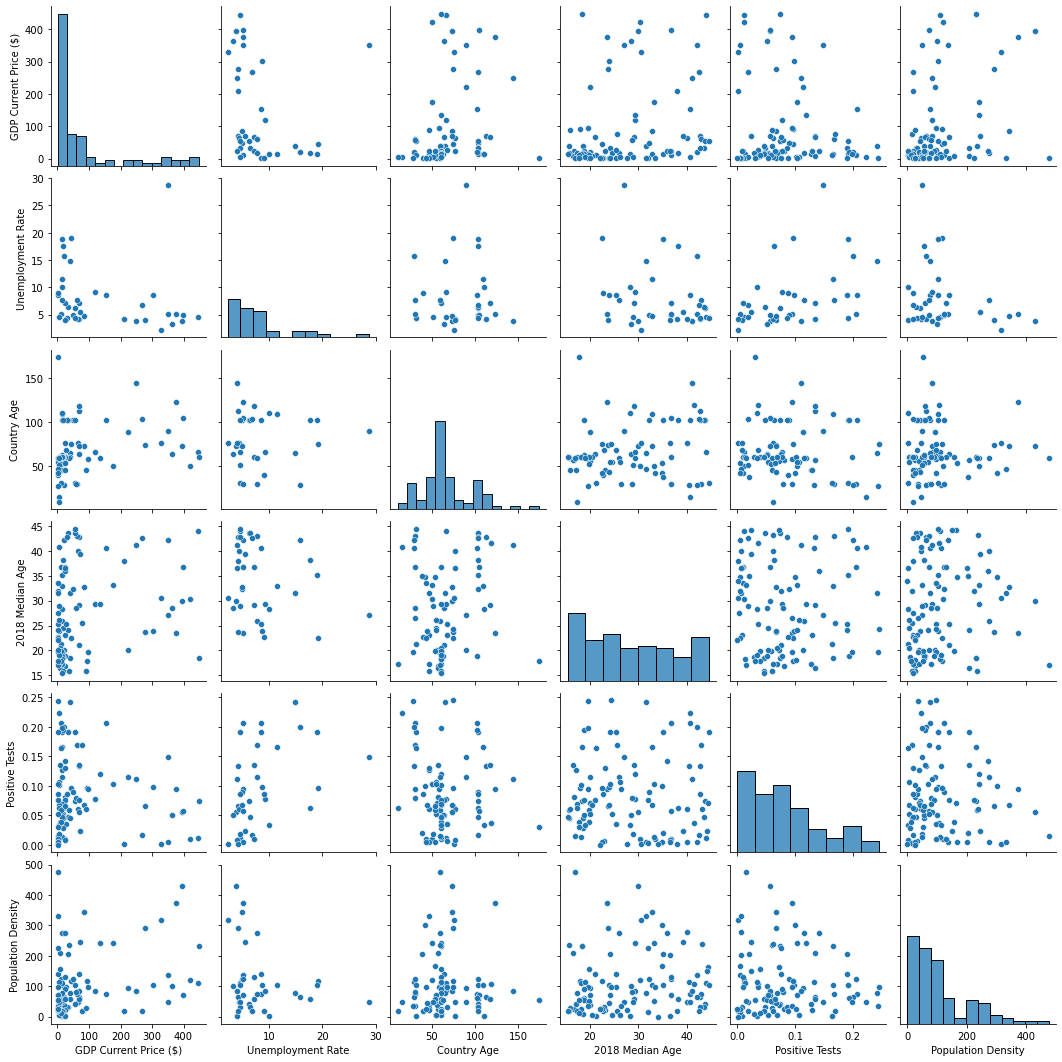

In [25]:
sns.pairplot(df2[["GDP Current Price ($)", "Unemployment Rate", "Country Age", "2018 Median Age", "Positive Tests", "Population Density"]])

## Statistics tests between Population Density and Positive Tests rate

In [26]:
# Pearson's correlation
df2 = df2.dropna(subset = {'Population Density', 'Positive Tests'})
corr, _ = pearsonr(df2['Population Density'], df2['Positive Tests'])
print('Pearsons correlation: %.3f' % corr)
# Spearman's correlation
corr, _ = spearmanr(df2['Population Density'], df2['Positive Tests'])
print('Spearmans correlation: %.3f' % corr)

Pearsons correlation: -0.058
Spearmans correlation: 0.066


# Machine Learning and Linear Regression
In this section we will traing the model by our data so we can predict the
values of the positive tests rate by the country attributes in the future, and find
the relation between them.

Slope: [[-6.35347259e-05]]
Intercept: [0.10442297]
R2: 0.011088184648097243


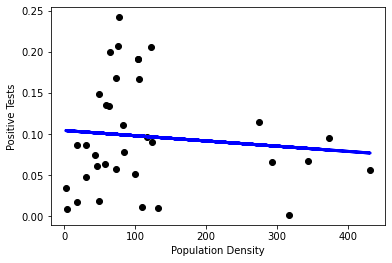

In [27]:
lr_population = linear_model.LinearRegression() # create a linear regression object

# Dropping Nans
df2 = df2.dropna(how='any')
# Set X and Y
x = df2['Population Density'].values.reshape(df2['Population Density'].shape[0],1)
y = df2['Positive Tests'].values.reshape(df2['Positive Tests'].shape[0],1)
# Train the model
lr_population.fit(X=x, y=y)

# Visualization of the relation
plt.scatter(x, y,  color='black')
# Adding the prediction to the plot
plt.plot(x, lr_population.predict(x), color='blue', linewidth=3)

# labels
plt.xlabel('Population Density')
plt.ylabel('Positive Tests')

print("Slope:",lr_population.coef_)
print("Intercept:",lr_population.intercept_)
print("R2:",lr_population.score(x,y))

Slope: [[0.0048119]]
Intercept: [0.05799806]
R2: 0.17589396484095832


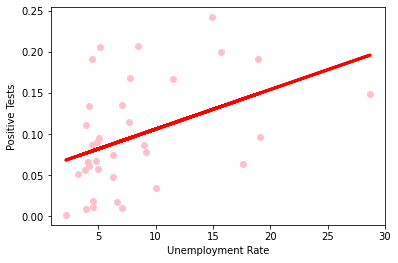

In [28]:
lr_unemployment = linear_model.LinearRegression() # create a linear regression object

# Dropping Nans
df2 = df2.dropna(how='any')
# Set X and Y
x = df2['Unemployment Rate'].values.reshape(df2['Unemployment Rate'].shape[0],1)
y = df2['Positive Tests'].values.reshape(df2['Positive Tests'].shape[0],1)
# Train the model
lr_unemployment.fit(X=x, y=y)

# Visualization of the relation
plt.scatter(x, y,  color='pink')
# Adding the prediction to the plot
plt.plot(x, lr_unemployment.predict(x), color='red', linewidth=3)
 
# labels
plt.xlabel('Unemployment Rate')
plt.ylabel('Positive Tests')

print("Slope:",lr_unemployment.coef_)
print("Intercept:",lr_unemployment.intercept_)
print("R2:",lr_unemployment.score(x,y))

Slope: [[0.00105121]]
Intercept: [0.06073043]
R2: 0.012421038137136242


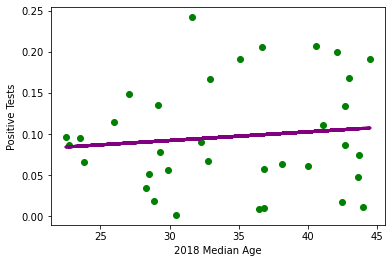

In [29]:
lr_median = linear_model.LinearRegression() # create a linear regression object

# Dropping Nans
df2 = df2.dropna(how='any')
# Set X and Y
x = df2['2018 Median Age'].values.reshape(df2['2018 Median Age'].shape[0],1)
y = df2['Positive Tests'].values.reshape(df2['Positive Tests'].shape[0],1)
# Train the model
lr_median.fit(X=x, y=y)

# Visualization of the relation
plt.scatter(x, y,  color='green')
# Adding the prediction to the plot
plt.plot(x, lr_median.predict(x), color='purple', linewidth=3)

# labels
plt.xlabel('2018 Median Age')
plt.ylabel('Positive Tests')

print("Slope:",lr_median.coef_)
print("Intercept:",lr_median.intercept_)
print("R2:",lr_median.score(x,y))